# Tarea 2: ¿Es posible explicar la cantidad de billonarios en base al desarrollo país?  <a class="tocSkip"></a>







## Introducción

En 2006 *Daniel Treisman* publicó un artículo titulado [*Russia Billionaries*](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.p20161068) en el cual conectó la cantidad de billonarios de un país con ciertos atributos económicos de los mismos. 

Su conclusión principal fue que Rusia tiene una cantidad de billonarios mayor que la que predicen los indicadores económicos

En esta tarea ustedes analizarán datos para comprobar o refutar los hallazgos de *D. Treisman*

## Datos

Para esta tarea se les provee de un conjunto de datos indexado por país con los siguientes atributos
- `nbillonarios`: La cantidad de billonarios del pais
- `logpibpc`: El logaritmo del Producto Interno Bruto (PIB) per capita del pais
- `logpob`: El logaritmo de la población del pais
- `gatt`: La cantidad de años que el pais está adherido al *General Agreement on Tariffs and Trade* (GATT)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
df = pd.read_csv('billonarios.csv', index_col='pais')
df.shape

(197, 4)

## Modelo

El objetivo principal de esta tarea es entrenar un modelo de regresión que prediga la cantidad de billonarios en función de los demás atributos

> Note que el número de billonarios es una variable entera y no-negativa. Un modelo de regresión con verosimilitud Gaussiano no es apropiado

Se pide entonces que use una [regresión de Poisson](https://en.wikipedia.org/wiki/Poisson_distribution), definimos entonces la probabilidad condicional para un pais $i$ como  

$$
p(y_i | x_i ) = \frac{\lambda_i^{y_i}}{y_i!} \exp \left ({-\lambda_i} \right)
$$

con

$$
\lambda_i = \exp \left (\theta_0 + \sum_{j=1}^M \theta_j x_{ij} \right)
$$

donde 
- $\theta$ es el vector de parámetros que deseamos ajustar 
- $y_i$ y $x_i$ son la cantidad de billonarios y el vector de atributos del país $i$, respectivamente

Considerando esto, se pide que

> Ajuste $\theta$ mediante la maximización de la verosimilitud

En primer lugar se pide que
1. Estudie y describa la distribución de Poisson en detalle. Muestre como varía la distribución en función de su parámetro $\lambda$, ¿Qué ocurre cuando $\lambda$ es grande?
1. Aplique el supuesto iid. Obtenga y muestre una expresión analítica para el logaritmo de la verosimilitud del problema
1. Obtenga y muestre una expresión analítica para la primera deriviada del logaritmo de la verosimilitud


$$
f_\theta(x_i) = \theta_0 + \sum_{j=1}^D \theta_j x_{ij}
$$


$$
\log \mathcal{L}(\theta) = \sum_{i=1}^M \log p(y_i |\lambda_i)
$$

Dado que $y_i$ sigue una distribución de poisson, entonces:

$$
\log p(y_i | \exp (f_\theta(x_i)) ) = \log (\frac{\exp (f_\theta(x_i))^{y_i}}{y_i!} \exp \left ({-\exp (f_\theta(x_i))} \right))
$$
$$
= \log (\frac{\exp (f_\theta(x_i))^{y_i}}{y_i!}) + \log( \exp \left ({-\exp (f_\theta(x_i))} \right)) 
$$

$$
= \log \exp (f_\theta(x_i))^{y_i} - \log({y_i!}) + \log( \exp \left ({-\exp (f_\theta(x_i))} \right)) 
$$
$$
=  {y_i} f_\theta(x_i) - \log({y_i!}) + -\exp f_\theta(x_i)
$$
$$
\log \mathcal{L}(\theta) = \sum_{i=1}^M {y_i} f_\theta(x_i) + \log({y_i!}) -\exp f_\theta(x_i)
$$

Si aplicamos la derivada...
$$
\frac{d}{d\theta_j} \log \mathcal{L}(\theta) =  \sum_{i=1}^M {y_i} \frac{d f_\theta(x_i)}{d\theta_j} - \exp f_\theta(x_i) \frac{d f_\theta(x_i)}{d\theta_j}
$$

$$
= \sum_{i=1}^M [{y_i} - \exp f_\theta(x_i)] \frac{d f_\theta(x_i)}{d\theta_j}
$$

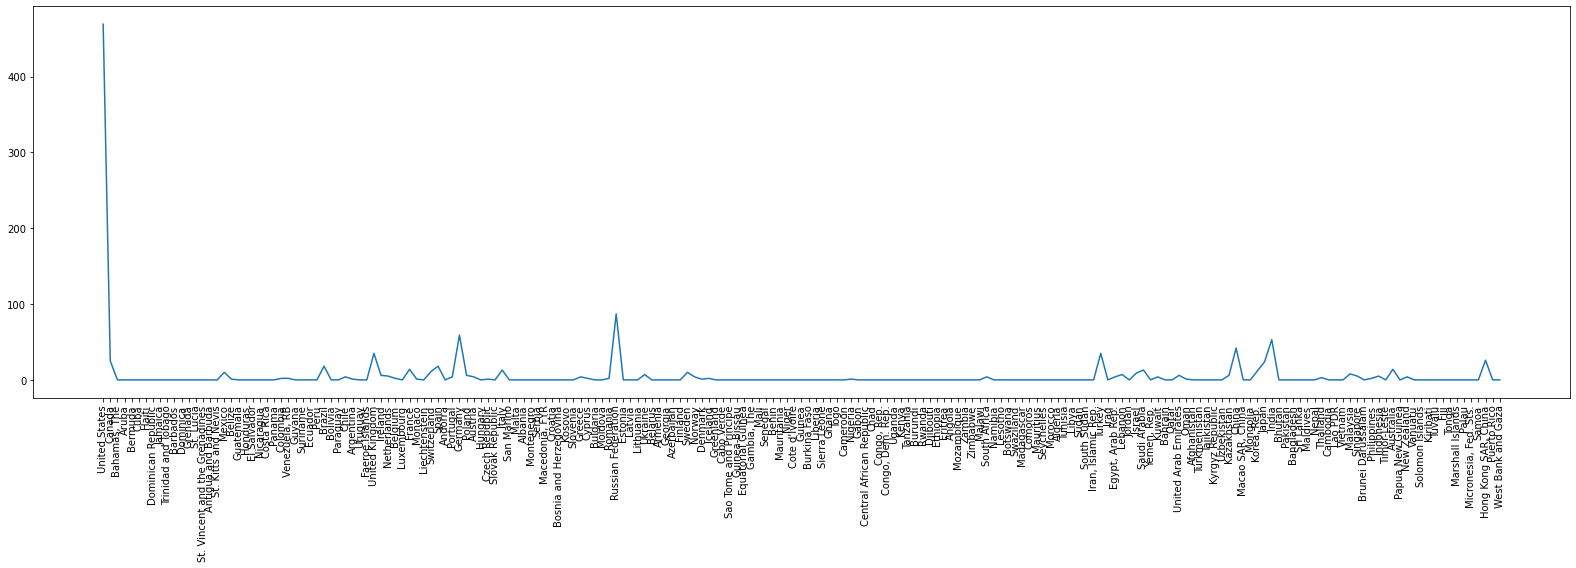

In [2]:
#graficar billonarios
billons = df.iloc[:, 0]
fig, ax = plt.subplots(figsize=(22, 8), tight_layout=True)

ax.plot(billons);

plt.xticks(rotation=90);




In [6]:
def modelo(theta, X):
    f = theta[0] + np.sum(theta[1:]*X, axis=1)
    print(f.shape)
    return (np.exp(f)), f

def log_verosimilitud(theta, *args):
    X, y = args
    lamb, f = modelo(theta, X)
    return np.sum(y*f - np.exp(f))
    
def der_log_verosimilitud(theta, *args): #segun profe
    X, y = args
    N = len(y)
    lamb, f = modelo(theta, X)
    X1 = np.concatenate((np.ones(shape=(N, 1)), X), axis=1) # df / dtheta
    aux = y - np.exp(f)
    return np.sum(aux[:, np.newaxis]*X1, axis=0) # dL / dtheta   





In [7]:
theta = np.random.randn(1+X.shape[1])
y = df['nbillonarios'].values
X = df.iloc[:, 1:].values
res = scipy.optimize.minimize(fun=log_verosimilitud, x0=theta, method='BFGS', args=(X,y), tol=1e-1)
res.message

(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)

<ipython-input-6-ccbc38c05d9b>:4: RuntimeWarning: overflow encountered in exp
  return (np.exp(f)), f
<ipython-input-6-ccbc38c05d9b>:9: RuntimeWarning: overflow encountered in exp
  return np.sum(y*f - np.exp(f))
/opt/miniconda3/envs/info147/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0



(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,)
(197,

<ipython-input-6-ccbc38c05d9b>:4: RuntimeWarning: overflow encountered in exp
  return (np.exp(f)), f
<ipython-input-6-ccbc38c05d9b>:9: RuntimeWarning: overflow encountered in exp
  return np.sum(y*f - np.exp(f))
/opt/miniconda3/envs/info147/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


'Desired error not necessarily achieved due to precision loss.'

## Implementación

1. Implemente el logaritmo de la verosimilitud y su derivada usando `numpy`
1. Encuentre el vector de parámetros óptimo usando `scipy.optimize.minimize`, justifique su decisión para el método y argumentos a usar
1. Implemente una rutina que calcule el pseudo coeficiente de correlación
$$
R^2 = \frac{\log \mathcal{L} (\hat \theta_0) - \log \mathcal{L} (\hat \theta) }{\log \mathcal{L} (\hat \theta_0)} \in [0, 1]
$$
donde $\log \mathcal{L} (\hat \theta)$ es el logaritmo de la verosimilitud de su mejor modelo y $\log \mathcal{L} (\hat \theta_0)$ es el logaritmo de la verosimilitud de un modelo que tiene sólo el parámetro $\theta_0$
1. Implemente una rutina de bootstrap resampling para encontrar la distribución y los intervalos de confianza empíricos para $\theta$ y para el pseudo coeficiente de correlación


## Resultados

1. Prediga la cantidad de billonarios de cada país usando su modelo. Muestre la cantidad de billonarios predicha y real para cada continente. ¿Qué puede comentar al respecto?
1. Muestre las distribuciones empíricas de los parámetros y del pseudo coeficiente de correlación. ¿Cuáles parámetros tienen $\theta$ significativamente distinto de cero? ¿Cuál es el intervalo de confianza al 95% del $R^2$? En base a esto ¿Qué puede decir sobre su modelo?
1. Gráfique el error entre la cantidad de billonarios predicha y la cantidad de billonarios real. El gráfico debe mostrar los paises ordenados de mayor a menor **error absoluto**.  Analice ¿Cuáles son los 5 países con mayor error en la predicción? ¿Cuáles paises tienen un exceso de billonarios? ¿Cúales paises tienen menos billonarios de lo esperado? ¿Qué puede decir sobre Rusia?



## Conclusiones

Resuma sus principales hallazgos y comenté sobre las desafios encontrados al desarrollar esta tarea 